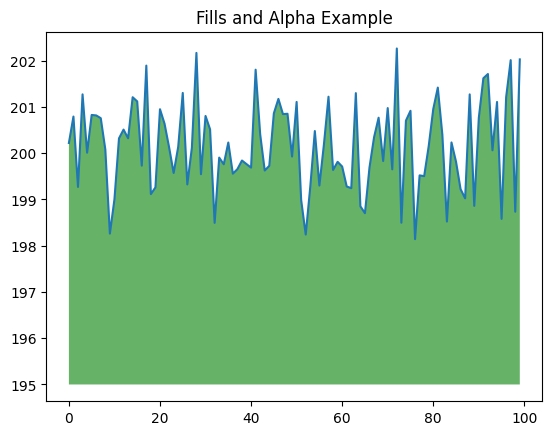

In [91]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

In [92]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

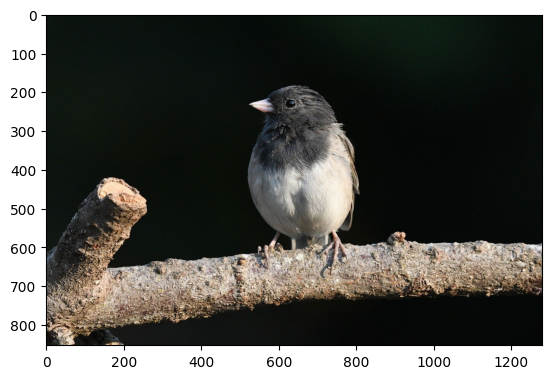

In [93]:
#== Processing =======================================================================
#-- Read image -----------------------------------------------------------------------
img = img = io.imread('pictures/dark-eyed-junco.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

%matplotlib inline
plt.imshow(img)
plt.show()

In [94]:
#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

In [95]:
#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
#_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

In [96]:
#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

In [98]:
#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

cv2.imshow('img', masked)                                   # Display

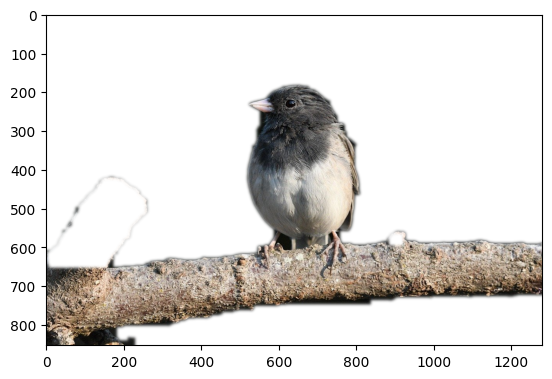

True

In [99]:
# split image into channels
c_red, c_green, c_blue = cv2.split(img)

# merge with mask got on one of a previous steps
img_a = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(img_a)
plt.show()

# save to disk
cv2.imwrite('picture.png', img_a)


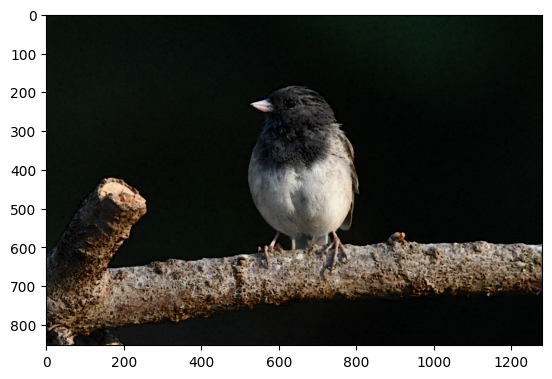

In [100]:
#Minimum filter
size = (3, 3)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
min_image = cv2.erode(img, kernel)

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(min_image)
plt.show()

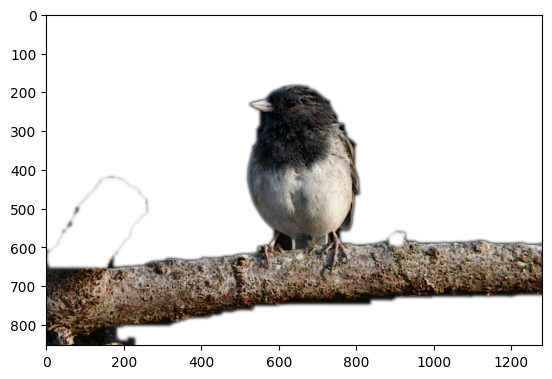

In [101]:
# split image into channels
c_red, c_green, c_blue = cv2.split(min_image)

# merge with mask got on one of a previous steps
img_a_min = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(img_a_min)
plt.show()

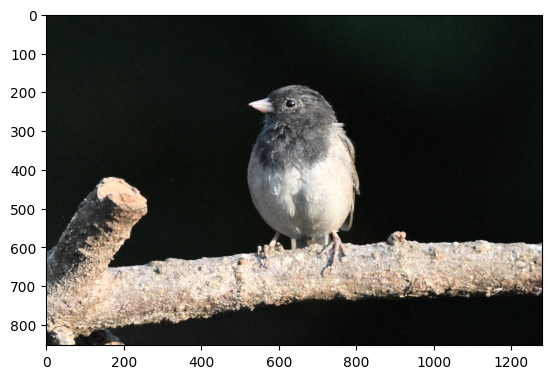

In [102]:
# Creates the shape of the kernel
size = (3,3)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)

# Applies the maximum filter with kernel NxN
max_image = cv2.dilate(img, kernel)

%matplotlib inline
plt.imshow(max_image)
plt.show()

In [103]:
#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
max_image       = max_image.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * max_image) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

# cv2.imshow('min_image', masked)  

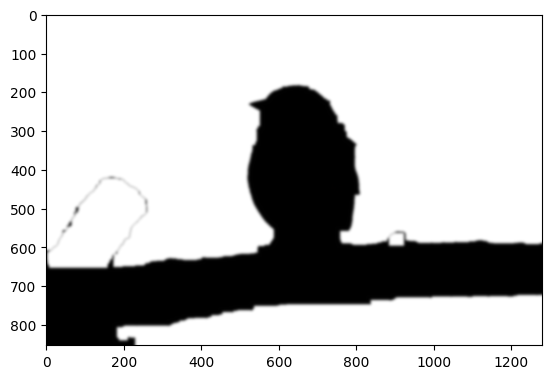

In [104]:
# split image into channels
c_red, c_green, c_blue = cv2.split(max_image)

# merge with mask got on one of a previous steps
img_a_max = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(img_a_max)
plt.show()

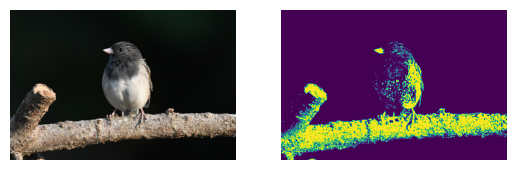

In [105]:
#Another Option

import numpy as np
from skimage import io, color

rgb = io.imread('pictures/dark-eyed-junco.jpg')

img = color.rgb2lab(rgb)

thresholded = np.logical_and(*[img[..., i] > t for i, t in enumerate([40, 0, 0])])

from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(rgb);         ax[0].axis('off')
ax[1].imshow(thresholded); ax[1].axis('off')
plt.show()

In [106]:
from scipy.ndimage import median_filter
import numpy as np

arr = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
median_filter(arr, size=3, cval=0, mode='constant')
#with cval=0, mode='constant' we set that input array is extended with zeros 
#when window overlaps edges, just for visibility and ease of calculation

array([[0., 2., 0.],
       [2., 5., 3.],
       [0., 5., 0.]])

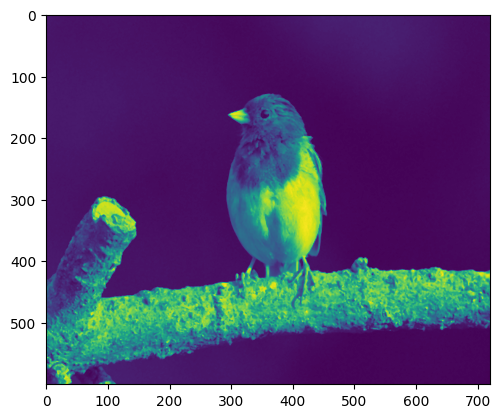

In [107]:
import cv2
from skimage.filters import median

SP_IMG = cv2.imread("pictures/dark-eyed-junco.jpg", 0)
IMG = cv2.resize(SP_IMG, (720, 600))

IMG = IMG

Opencv_Median = cv2.medianBlur(IMG, 3)

%matplotlib inline
plt.imshow(Opencv_Median)
plt.show()

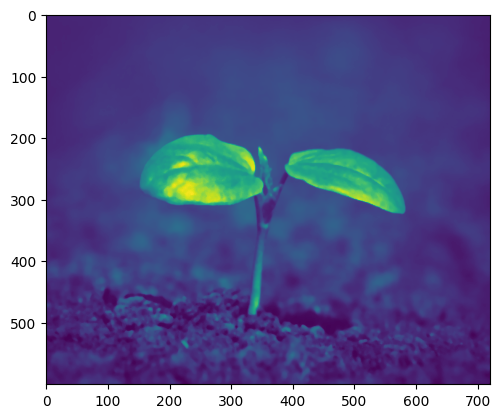

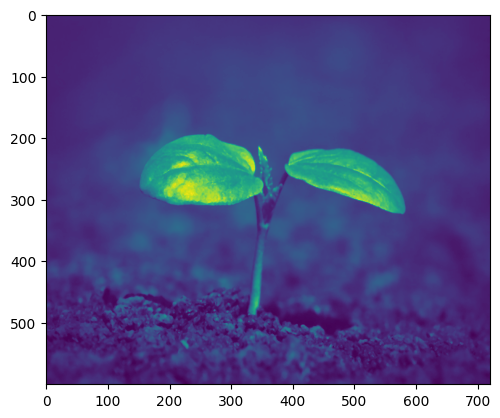

In [108]:
from skimage.morphology import disk
import cv2
from skimage.filters import median

SP_IMG = cv2.imread("pictures/plant.jpg", 0)
IMG = cv2.resize(SP_IMG, (720, 600))

IMG = IMG

Opencv_Median = cv2.medianBlur(IMG, 3)

SK_Median = median(IMG, disk(3), mode="constant", cval=0.0)

%matplotlib inline
plt.imshow(SK_Median)
plt.show()

%matplotlib inline
plt.imshow(Opencv_Median)
plt.show()

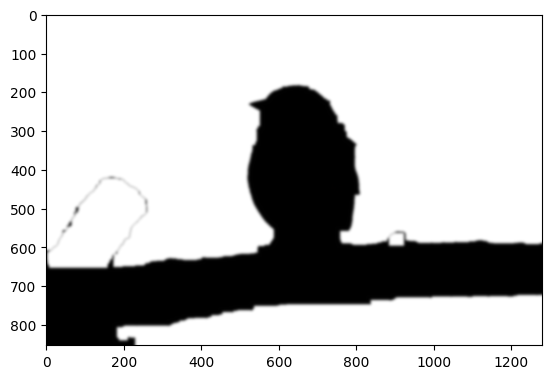

In [109]:
# split image into channels
c_red, c_green, c_blue = cv2.split(max_image)

# merge with mask got on one of a previous steps
Opencv_Median = cv2.merge((c_red, c_green, c_blue, mask.astype('float32') / 255.0))

# show on screen (optional in jupiter)
%matplotlib inline
plt.imshow(Opencv_Median )
plt.show()

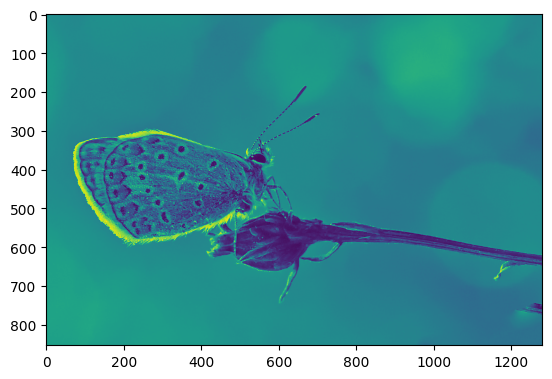

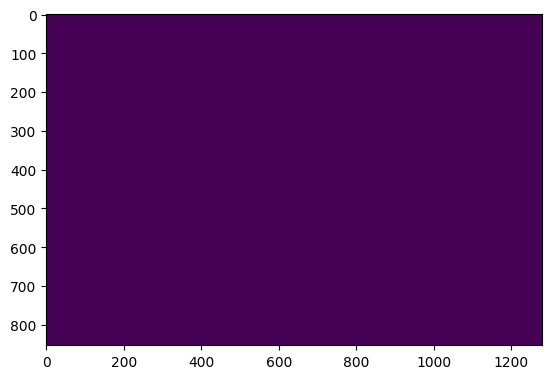

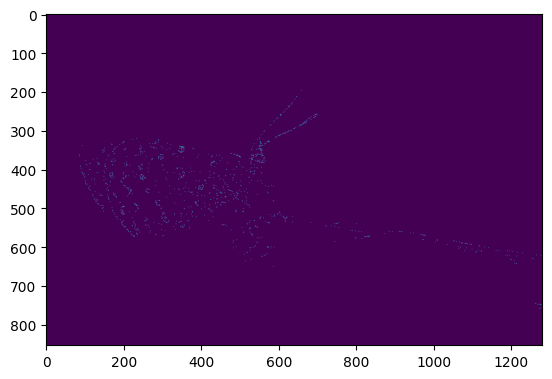

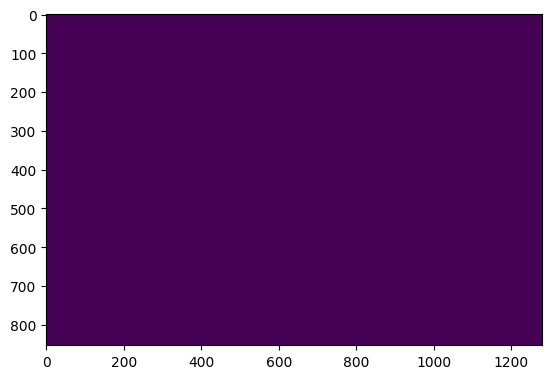

In [116]:
# https://de.acervolima.com/hintergrundsubtraktion-opencv/

import numpy as np 
import cv2 
  
fgbg1 = cv2.bgsegm.createBackgroundSubtractorMOG();    
fgbg2 = cv2.createBackgroundSubtractorMOG2(); 
fgbg3 = cv2.bgsegm.createBackgroundSubtractorGMG(); 
  
cap = cv2.VideoCapture(0); 
    
img_1 = cv2.imread("pictures/butterfly.jpg", 0)
      
    
fgmask1 = fgbg1.apply(img_1); 
fgmask2 = fgbg2.apply(img_1); 
fgmask3 = fgbg3.apply(img_1); 
      
plt.imshow(img_1)
plt.show()

plt.imshow(fgmask1)
plt.show()

plt.imshow(fgmask2)
plt.show()

plt.imshow(fgmask3)
plt.show()
    
